In [4]:
#Load all the data to dataFrames
import pandas as pd
import numpy as np
import re
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as dates
import seaborn as sns
plt.style.use('fivethirtyeight')
#Create  dataframes
df_air_visit_data = pd.read_csv('D:\\GitHUB\\recruit_Data\\air_visit_data.csv') #this is the training data
df_air_store_info = pd.read_csv('D:\\GitHUB\\recruit_Data\\air_store_info.csv')
df_hpg_store_info = pd.read_csv('D:\\GitHUB\\recruit_Data\\hpg_store_info.csv')
df_air_reserve = pd.read_csv('D:\\GitHUB\\recruit_Data\\air_reserve.csv')
df_hpg_reserve = pd.read_csv('D:\\GitHUB\\recruit_Data\\hpg_reserve.csv')
df_store_id_realation = pd.read_csv('D:\\GitHUB\\recruit_Data\\store_id_relation.csv')
df_test_set = pd.read_csv('D:\\GitHUB\\recruit_Data\\sample_submission.csv')
df_date_info = pd.read_csv('D:\\GitHUB\\recruit_Data\\date_info.csv')

In [5]:
"""
Now inner join hpg_reserve, store_id_realation to get only those hpg stores which are having reservation info

This can be helpful in getting hpg to air relation too.
"""
df_hpg_reserve_air_mapped = pd.merge(df_hpg_reserve,df_store_id_realation,on='hpg_store_id',how='inner')

In [6]:
#Neat Date-time format conversion
df_air_reserve.visit_datetime = pd.to_datetime(df_air_reserve.visit_datetime)
df_air_reserve.reserve_datetime = pd.to_datetime(df_air_reserve.reserve_datetime)
df_air_visit_data.visit_date = pd.to_datetime(df_air_visit_data.visit_date)
df_hpg_reserve_air_mapped.visit_datetime = pd.to_datetime(df_hpg_reserve_air_mapped.visit_datetime)
df_hpg_reserve_air_mapped.reserve_datetime  = pd.to_datetime(df_hpg_reserve_air_mapped.reserve_datetime)
df_date_info.calendar_date = pd.to_datetime(df_date_info.calendar_date)

In [7]:
#change the index of df_date_info to calendar_date
df_date_info = df_date_info.set_index('calendar_date')

In [8]:
#creating holiday flag,,weekday column for air_reserve data
df_air_reserve['visit_date'] = df_air_reserve.visit_datetime.dt.date
df_air_reserve['holiday_flg'] = df_air_reserve.visit_date.apply(lambda x : df_date_info.loc[x]['holiday_flg'])
df_air_reserve['day_of_week'] = df_air_reserve.visit_date.apply(lambda x : df_date_info.loc[x]['day_of_week'])

In [9]:
#creating holiday flag ,weekday column for air_visit data
df_air_visit_data['holiday_flg'] = df_air_visit_data.visit_date.apply(lambda x : df_date_info.loc[x]['holiday_flg'])
df_air_visit_data['day_of_week'] = df_air_visit_data.visit_date.apply(lambda x : df_date_info.loc[x]['day_of_week'])

In [10]:
#creating holiday flag ,weekday column for df_hpg_reserve_air_mapped
df_hpg_reserve_air_mapped['visit_date'] = df_hpg_reserve_air_mapped.visit_datetime.dt.date
df_hpg_reserve_air_mapped['holiday_flg'] = df_hpg_reserve_air_mapped.visit_date.apply(lambda x : df_date_info.loc[x]['holiday_flg'])
df_hpg_reserve_air_mapped['day_of_week'] = df_hpg_reserve_air_mapped.visit_date.apply(lambda x : df_date_info.loc[x]['day_of_week'])

In [11]:
#Combine air_reserve and hpg_reserve data
df_hpg_reserve_air_mapped = df_hpg_reserve_air_mapped.drop('hpg_store_id',axis=1)
df_hpg_reserve_air_total = df_hpg_reserve_air_mapped.append(df_air_reserve)

#After appending, df_hpg_reserve_air_mapped with df_air_reserve, drop the duplicates 
df_hpg_reserve_air_total = df_hpg_reserve_air_total.drop_duplicates()

In [12]:
len(df_hpg_reserve_air_total.air_store_id.unique())

333

In [13]:
#Inner join df_hpg_store_info & df_store_id_realtion to get only required hpg stores which are mapped to air stores
df_hpg_store_info_joined = pd.merge(df_hpg_store_info,df_store_id_realation,how='inner',on='hpg_store_id')
df_hpg_store_info_joined = df_hpg_store_info_joined.drop('hpg_store_id',axis=1)

In [14]:
#Rename columns
df_hpg_store_info_joined = df_hpg_store_info_joined.rename(columns={'hpg_genre_name':'air_genre_name','hpg_area_name':'air_area_name'})

In [15]:
df_hpg_store_info_joined.head()

,air_genre_name,air_area_name,latitude,longitude,air_store_id
0,Japanese style,Tōkyō-to Chūō-ku Ginza,35.668600,139.763043,air_2aab19554f91ff82
1,Japanese style,Tōkyō-to Sumida-ku Tachibana,35.704960,139.828642,air_258ad2619d7bff9a
2,Japanese style,Hiroshima-ken Hiroshima-shi Hondōri,34.392106,132.461914,air_c47aa7493b15f297
3,Japanese style,Ōsaka-fu Ōsaka-shi Shinsaibashisuji,34.669514,135.501425,air_96005f79124e12bf
4,Japanese style,Tōkyō-to Taitō-ku None,35.711353,139.782684,air_f2c5a1f24279c531


In [16]:
df_hpg_store_info_joined.shape

(63, 5)

In [17]:
df_air_store_info.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [18]:
df_air_hpg_total_store_info = df_air_store_info.append(df_hpg_store_info_joined)

In [19]:
df_air_hpg_total_store_info.head()

,air_area_name,air_genre_name,air_store_id,latitude,longitude
0,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_0f0cdeee6c9bf3d7,34.695124,135.197852
1,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_7cc17a324ae5c7dc,34.695124,135.197852
2,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_fee8dcf4d619598e,34.695124,135.197852
3,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_a17f0778617c76e2,34.695124,135.197852
4,Tōkyō-to Minato-ku Shibakōen,Italian/French,air_83db5aff8f50478e,35.658068,139.751599


In [20]:
df_air_hpg_total_store_info.shape

(892, 5)

In [21]:
# df_hpg_reserve_air_total --> dataFrame Having both hpg & air restaurant's reserve visitor's data
# df_air_hpg_total_store_info ---> dataFrame Having both hpg & air restaurant's store info, summing up 892 stores info

In [22]:
df_hpg_reserve_air_mapped.head()

,visit_datetime,reserve_datetime,reserve_visitors,air_store_id,visit_date,holiday_flg,day_of_week
0,2016-01-01 19:00:00,2016-01-01 15:00:00,4,air_db80363d35f10926,2016-01-01,1,Friday
1,2016-01-02 19:00:00,2016-01-02 14:00:00,2,air_db80363d35f10926,2016-01-02,1,Saturday
2,2016-01-03 18:00:00,2016-01-02 20:00:00,6,air_db80363d35f10926,2016-01-03,1,Sunday
3,2016-01-06 20:00:00,2016-01-04 22:00:00,3,air_db80363d35f10926,2016-01-06,0,Wednesday
4,2016-01-11 18:00:00,2016-01-11 14:00:00,2,air_db80363d35f10926,2016-01-11,1,Monday


In [23]:
df_hpg_reserve_air_total.head()

,air_store_id,day_of_week,holiday_flg,reserve_datetime,reserve_visitors,visit_date,visit_datetime
0,air_db80363d35f10926,Friday,1,2016-01-01 15:00:00,4,2016-01-01,2016-01-01 19:00:00
1,air_db80363d35f10926,Saturday,1,2016-01-02 14:00:00,2,2016-01-02,2016-01-02 19:00:00
2,air_db80363d35f10926,Sunday,1,2016-01-02 20:00:00,6,2016-01-03,2016-01-03 18:00:00
3,air_db80363d35f10926,Wednesday,0,2016-01-04 22:00:00,3,2016-01-06,2016-01-06 20:00:00
4,air_db80363d35f10926,Monday,1,2016-01-11 14:00:00,2,2016-01-11,2016-01-11 18:00:00


In [24]:
df_air_hpg_total_store_info.head()

,air_area_name,air_genre_name,air_store_id,latitude,longitude
0,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_0f0cdeee6c9bf3d7,34.695124,135.197852
1,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_7cc17a324ae5c7dc,34.695124,135.197852
2,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_fee8dcf4d619598e,34.695124,135.197852
3,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_a17f0778617c76e2,34.695124,135.197852
4,Tōkyō-to Minato-ku Shibakōen,Italian/French,air_83db5aff8f50478e,35.658068,139.751599


In [25]:
#set index of df_air_hpg_total_store_info as air_store_id
#df_air_hpg_total_store_info = df_air_hpg_total_store_info.set_index('air_store_id')
df_air_hpg_total_store_info.head()

,air_area_name,air_genre_name,air_store_id,latitude,longitude
0,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_0f0cdeee6c9bf3d7,34.695124,135.197852
1,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_7cc17a324ae5c7dc,34.695124,135.197852
2,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_fee8dcf4d619598e,34.695124,135.197852
3,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_a17f0778617c76e2,34.695124,135.197852
4,Tōkyō-to Minato-ku Shibakōen,Italian/French,air_83db5aff8f50478e,35.658068,139.751599


In [26]:
#Merge df_air_hpg_total_store_info, df_air_visit_data to include latitude, longitude, genre, location
df_air_visit_train = pd.merge(df_air_hpg_total_store_info,df_air_visit_data,on='air_store_id',how='inner')
df_air_visit_train.head()

,air_area_name,air_genre_name,air_store_id,latitude,longitude,visit_date,visitors,holiday_flg,day_of_week
0,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_0f0cdeee6c9bf3d7,34.695124,135.197852,2016-07-01,18,0,Friday
1,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_0f0cdeee6c9bf3d7,34.695124,135.197852,2016-07-02,37,0,Saturday
2,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_0f0cdeee6c9bf3d7,34.695124,135.197852,2016-07-03,20,0,Sunday
3,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_0f0cdeee6c9bf3d7,34.695124,135.197852,2016-07-04,16,0,Monday
4,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_0f0cdeee6c9bf3d7,34.695124,135.197852,2016-07-05,15,0,Tuesday


In [27]:
#Adding time difference between reservation time & visiting time as a feature
df_hpg_reserve_air_total['time_diff'] = df_hpg_reserve_air_total['visit_datetime'].dt.date - df_hpg_reserve_air_total['reserve_datetime'].dt.date
df_hpg_reserve_air_total['time_diff'] = df_hpg_reserve_air_total['time_diff'].dt.days

In [28]:
df_hpg_reserve_air_total = pd.merge(df_air_hpg_total_store_info,df_hpg_reserve_air_total,on='air_store_id',how='inner')

In [29]:
df_air_hpg_total_store_info.head()

,air_area_name,air_genre_name,air_store_id,latitude,longitude
0,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_0f0cdeee6c9bf3d7,34.695124,135.197852
1,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_7cc17a324ae5c7dc,34.695124,135.197852
2,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_fee8dcf4d619598e,34.695124,135.197852
3,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_a17f0778617c76e2,34.695124,135.197852
4,Tōkyō-to Minato-ku Shibakōen,Italian/French,air_83db5aff8f50478e,35.658068,139.751599


In [30]:
df_hpg_reserve_air_total.head()

,air_area_name,air_genre_name,air_store_id,latitude,longitude,day_of_week,holiday_flg,reserve_datetime,reserve_visitors,visit_date,visit_datetime,time_diff
0,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_0f0cdeee6c9bf3d7,34.695124,135.197852,Friday,0,2016-06-16 20:00:00,3,2016-07-01,2016-07-01 18:00:00,15
1,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_0f0cdeee6c9bf3d7,34.695124,135.197852,Monday,0,2016-07-04 17:00:00,2,2016-07-04,2016-07-04 17:00:00,0
2,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_0f0cdeee6c9bf3d7,34.695124,135.197852,Monday,0,2016-07-01 20:00:00,8,2016-07-04,2016-07-04 20:00:00,3
3,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_0f0cdeee6c9bf3d7,34.695124,135.197852,Wednesday,0,2016-07-05 20:00:00,2,2016-07-06,2016-07-06 19:00:00,1
4,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_0f0cdeee6c9bf3d7,34.695124,135.197852,Wednesday,0,2016-07-04 14:00:00,5,2016-07-06,2016-07-06 19:00:00,2


In [31]:
df_hpg_reserve_air_total.tail()

,air_area_name,air_genre_name,air_store_id,latitude,longitude,day_of_week,holiday_flg,reserve_datetime,reserve_visitors,visit_date,visit_datetime,time_diff
127281,Hokkaidō Sapporo-shi Minami 4 Jōnishi,Party,air_7514d90009613cd6,43.055047,141.353236,Saturday,0,2017-03-23 12:00:00,24,2017-04-01,2017-04-01 00:00:00,9
127282,Hokkaidō Sapporo-shi Minami 4 Jōnishi,Party,air_7514d90009613cd6,43.055047,141.353236,Saturday,0,2017-03-28 16:00:00,17,2017-04-01,2017-04-01 00:00:00,4
127283,Hokkaidō Sapporo-shi Minami 4 Jōnishi,Party,air_7514d90009613cd6,43.055047,141.353236,Tuesday,0,2017-03-15 10:00:00,20,2017-04-04,2017-04-04 01:00:00,20
127284,Hokkaidō Sapporo-shi Minami 4 Jōnishi,Party,air_7514d90009613cd6,43.055047,141.353236,Saturday,0,2017-03-17 14:00:00,17,2017-04-08,2017-04-08 00:00:00,22
127285,Hokkaidō Sapporo-shi Minami 4 Jōnishi,Party,air_7514d90009613cd6,43.055047,141.353236,Saturday,1,2017-04-18 17:00:00,27,2017-04-29,2017-04-29 02:00:00,11


### Clean Test set data 

In [32]:
df_test_set.head()

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,0


In [33]:
#separate air_store_id & visit_date from id column of df_test_Set
df_test_set['air_store_id'] = df_test_set['id'].map(lambda x : "_".join(x.split('_')[:2]))
df_test_set['visit_date'] = df_test_set['id'].map(lambda x : "_".join(x.split('_')[2:]))
df_test_set.head()

,id,visitors,air_store_id,visit_date
0,air_00a91d42b08b08d9_2017-04-23,0,air_00a91d42b08b08d9,2017-04-23
1,air_00a91d42b08b08d9_2017-04-24,0,air_00a91d42b08b08d9,2017-04-24
2,air_00a91d42b08b08d9_2017-04-25,0,air_00a91d42b08b08d9,2017-04-25
3,air_00a91d42b08b08d9_2017-04-26,0,air_00a91d42b08b08d9,2017-04-26
4,air_00a91d42b08b08d9_2017-04-27,0,air_00a91d42b08b08d9,2017-04-27


In [34]:
#creating holiday flag ,weekday column for df_test_set
df_test_set['visit_date'] = pd.to_datetime(df_test_set['visit_date'])
df_test_set['holiday_flg'] = df_test_set['visit_date'].apply(lambda x : df_date_info.loc[x]['holiday_flg'])
df_test_set['day_of_week'] = df_test_set['visit_date'].apply(lambda x : df_date_info.loc[x]['day_of_week'])
df_test_set.head()

,id,visitors,air_store_id,visit_date,holiday_flg,day_of_week
0,air_00a91d42b08b08d9_2017-04-23,0,air_00a91d42b08b08d9,2017-04-23,0,Sunday
1,air_00a91d42b08b08d9_2017-04-24,0,air_00a91d42b08b08d9,2017-04-24,0,Monday
2,air_00a91d42b08b08d9_2017-04-25,0,air_00a91d42b08b08d9,2017-04-25,0,Tuesday
3,air_00a91d42b08b08d9_2017-04-26,0,air_00a91d42b08b08d9,2017-04-26,0,Wednesday
4,air_00a91d42b08b08d9_2017-04-27,0,air_00a91d42b08b08d9,2017-04-27,0,Thursday


# Exploratory Data Analysis on Visitor data with and without reservations made

#### Holiday Effect on reservations & visitors count

#### Reservation count

In [35]:
df_hpg_reserve_air_total.groupby(['holiday_flg','day_of_week']).sum()
#for holiday_flg = 0 (not a holiday) has more reserved visitors when compared to that of holiday(holiday_flg=1) for each weekday
#It means there is a good amount of business in weekdays which aren't holidays.
#interesting thing is though it's holiday or not; friday has highest number of customers in a week

latitude     longitude  reserve_visitors  \
holiday_flg day_of_week                                                 
0           Friday       9.308969e+05  3.504755e+06            126733   
            Monday       3.485402e+05  1.315288e+06             44389   
            Saturday     1.058648e+06  3.968128e+06            130903   
            Sunday       4.844272e+05  1.835681e+06             58667   
            Thursday     5.208879e+05  1.971772e+06             67075   
            Tuesday      4.495620e+05  1.699078e+06             56339   
            Wednesday    5.397778e+05  2.044356e+06             71371   
1           Friday       7.697772e+04  2.880986e+05              8823   
            Monday       4.918895e+04  1.841809e+05              5637   
            Saturday     4.940339e+04  1.837638e+05              5681   
            Sunday       1.776641e+04  6.646411e+04              2123   
            Thursday     6.317796e+04  2.370748e+05              7501   
            Tuesday      1.847429e+04  6.945985e+04              1917   
            Wednesday    2.401647e+04  9.105115e+04              2413   

                         time_diff  
holiday_flg day_of_week             
0           Friday          183734  
            Monday           52333  
            Saturday        213677  
            Sunday          142007  
            Thursday        125991  
            Tuesday          99899  
            Wednesday       143536  
1           Friday           18641  
            Monday            7118  
            Saturday          9353  
            Sunday            2599  
            Thursday         13705  
            Tuesday           2563  
            Wednesday         4011

In [36]:
#change the type of holiday_flg, day_of_week 
df_hpg_reserve_air_total.holiday_flg = df_hpg_reserve_air_total.holiday_flg.astype('category')
df_hpg_reserve_air_total.day_of_week = df_hpg_reserve_air_total.day_of_week.astype('category')

In [37]:
#do the short form of calendar days, viz Firday : Fri
df_hpg_reserve_air_total.day_of_week = df_hpg_reserve_air_total.day_of_week.map({"Friday":"Fri","Saturday":"Sat","Sunday":"Sun","Wednesday":"Wed","Monday":"Mon","Tuesday":"Tue","Thursday":"Thu"})

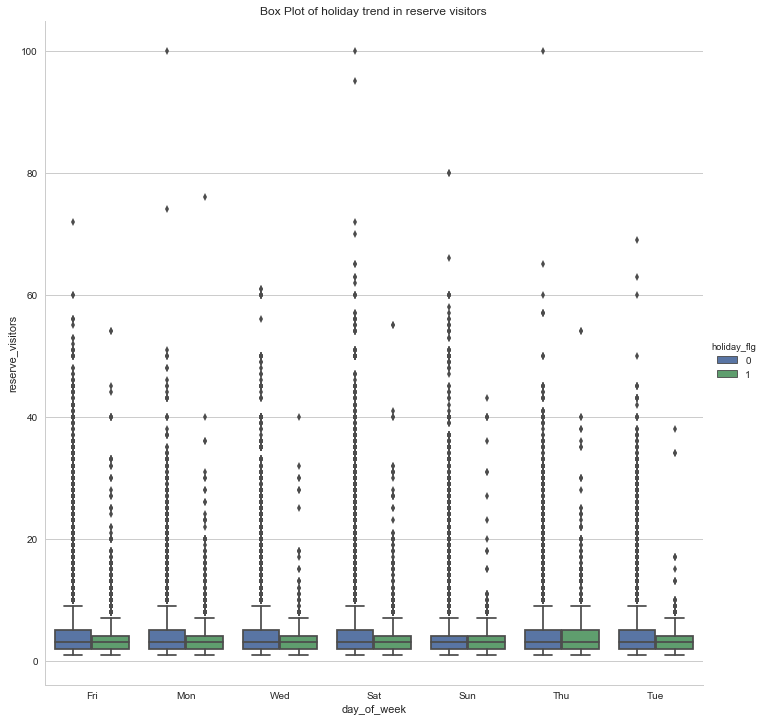

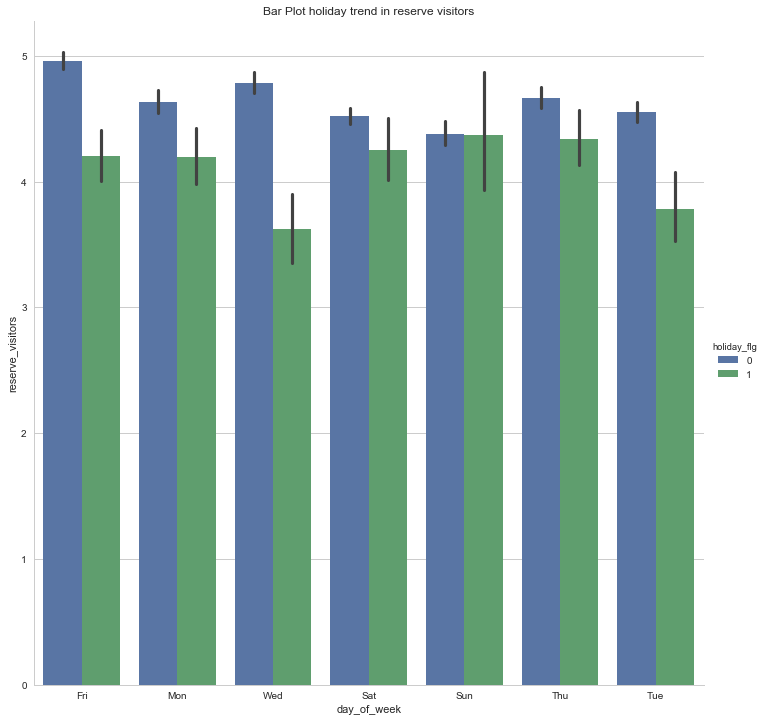

In [38]:
sns.set(style='whitegrid')
sns.factorplot(data=df_hpg_reserve_air_total, x='day_of_week',y='reserve_visitors',hue='holiday_flg',kind='box',size=10)
plt.title('Box Plot of holiday trend in reserve visitors')
sns.factorplot(data=df_hpg_reserve_air_total, x='day_of_week',y='reserve_visitors',hue='holiday_flg',kind='bar',size=10)
plt.title('Bar Plot holiday trend in reserve visitors')
plt.show()

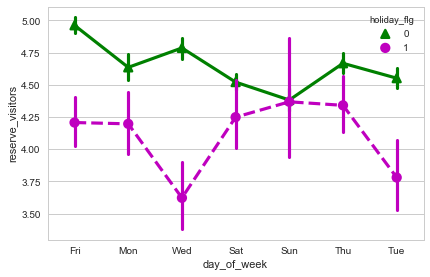

In [39]:
sns.pointplot(data=df_hpg_reserve_air_total, x='day_of_week',y='reserve_visitors',hue='holiday_flg',
             palette = {0:"g",1:"m"},
              markers=["^", "o"], linestyles=["-", "--"]
             )
plt.show()

#### Visitor Count

In [40]:
df_air_visit_train.groupby(['holiday_flg','day_of_week'])['visitors'].sum()

holiday_flg  day_of_week
0            Friday          973750
             Monday          506964
             Saturday       1082983
             Sunday          753655
             Thursday        701203
             Tuesday         677909
             Wednesday       749925
1            Friday           49729
             Monday           90953
             Saturday         47349
             Sunday           26790
             Thursday         81236
             Tuesday          15350
             Wednesday        22175
Name: visitors, dtype: int64

In [41]:
df_air_visit_train.holiday_flg = df_air_visit_train.holiday_flg.astype('category')
df_air_visit_train.day_of_week = df_air_visit_train.day_of_week.astype('category')
df_air_visit_train.day_of_week = df_air_visit_train.day_of_week.map({"Friday":"Fri","Saturday":"Sat","Sunday":"Sun","Wednesday":"Wed","Monday":"Mon","Tuesday":"Tue","Thursday":"Thu"})

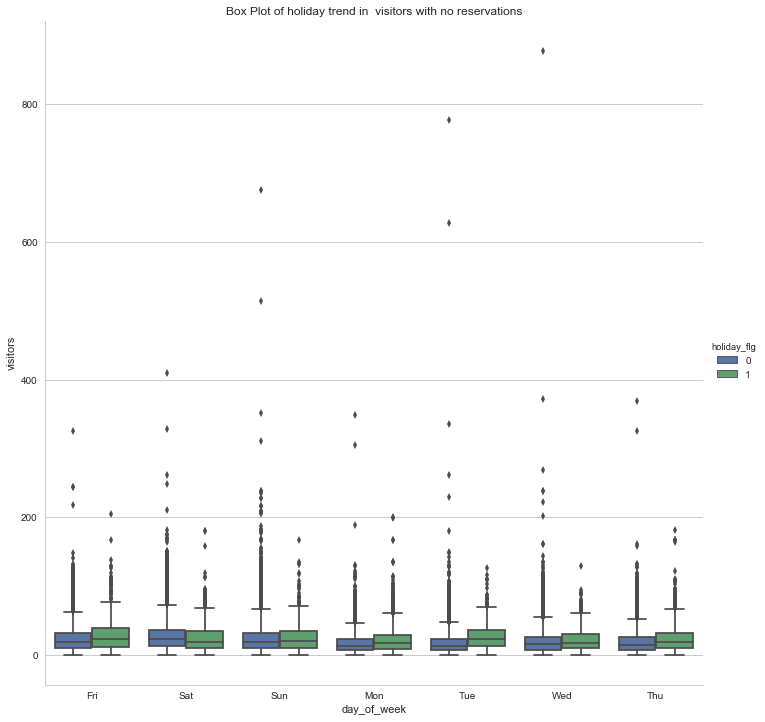

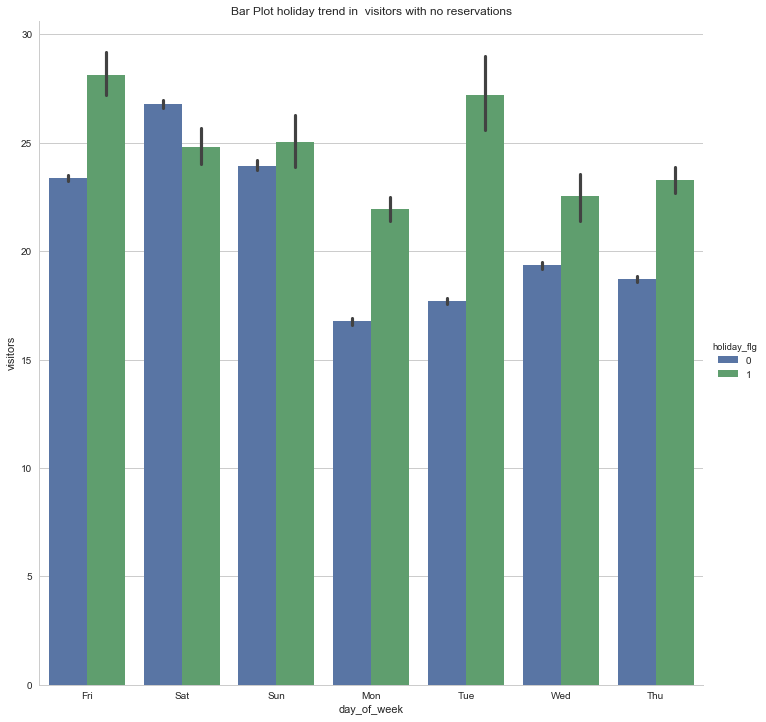

In [42]:
sns.set(style='whitegrid')
sns.factorplot(data=df_air_visit_train, x='day_of_week',y='visitors',hue='holiday_flg',kind='box',size=10)
plt.title('Box Plot of holiday trend in  visitors with no reservations')
sns.factorplot(data=df_air_visit_train, x='day_of_week',y='visitors',hue='holiday_flg',kind='bar',size=10)
plt.title('Bar Plot holiday trend in  visitors with no reservations')
plt.show()

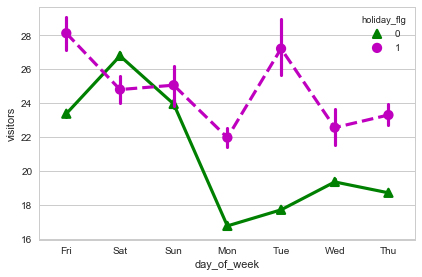

In [43]:
sns.pointplot(data=df_air_visit_train, x='day_of_week',y='visitors',hue='holiday_flg',
             palette = {0:"g",1:"m"},
              markers=["^", "o"], linestyles=["-", "--"]
             )
plt.show()

### Trend in visitor count with and without reservations

In [44]:
df1 = df_hpg_reserve_air_total[['visit_date', 'reserve_visitors']].groupby('visit_date').sum().reset_index()
#df1.visit_date = df1.visit_date.astype('str')
df2 = df_air_visit_train[['visit_date','visitors']].groupby('visit_date').sum().reset_index()
#df2.visit_date = df2.visit_date.astype('str')

In [45]:
df1 = df1.set_index('visit_date')
df2 = df2.set_index('visit_date')

In [46]:
df1.head()

,reserve_visitors
visit_date,
2016-01-01,43
2016-01-02,251
2016-01-03,197
2016-01-04,195
2016-01-05,114


In [47]:
df2.head()

,visitors
visit_date,
2016-01-01,1062
2016-01-02,1972
2016-01-03,2717
2016-01-04,3758
2016-01-05,4260


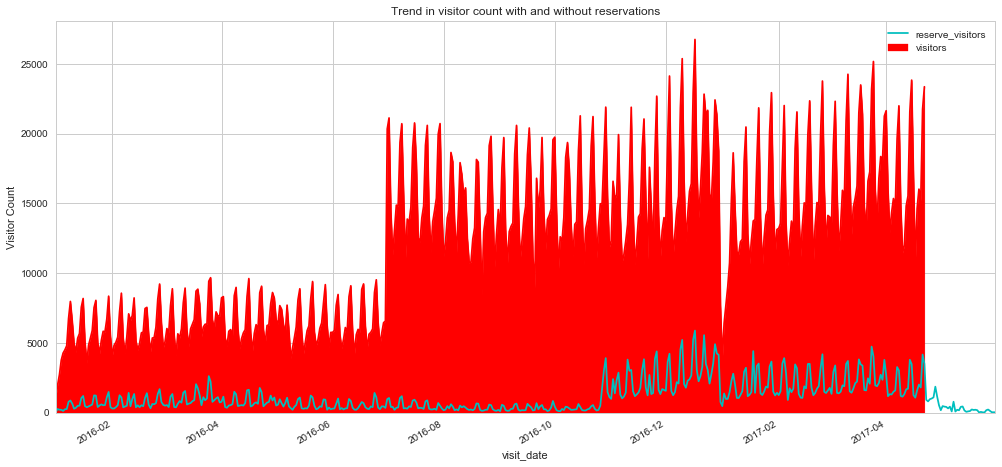

In [48]:
f,ax=plt.subplots(1,1,figsize=(15,8))
df1.plot(color='c',kind='line',ax=ax)
df2.plot(color='r',kind='area',ax=ax)
plt.ylabel('Visitor Count')
plt.title('Trend in visitor count with and without reservations')
plt.show()

From the plot above, it can be inferred that very high number customers are visiting restaurant without reservations in combined
air & hpg systems.

### Which Cuisine is most liked in overall restaurants

#### In visitors(no reservations) data

In [49]:
df_air_visit_train.head()

,air_area_name,air_genre_name,air_store_id,latitude,longitude,visit_date,visitors,holiday_flg,day_of_week
0,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_0f0cdeee6c9bf3d7,34.695124,135.197852,2016-07-01,18,0,Fri
1,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_0f0cdeee6c9bf3d7,34.695124,135.197852,2016-07-02,37,0,Sat
2,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_0f0cdeee6c9bf3d7,34.695124,135.197852,2016-07-03,20,0,Sun
3,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_0f0cdeee6c9bf3d7,34.695124,135.197852,2016-07-04,16,0,Mon
4,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_0f0cdeee6c9bf3d7,34.695124,135.197852,2016-07-05,15,0,Tue


In [50]:
df_hpg_reserve_air_total.head()

,air_area_name,air_genre_name,air_store_id,latitude,longitude,day_of_week,holiday_flg,reserve_datetime,reserve_visitors,visit_date,visit_datetime,time_diff
0,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_0f0cdeee6c9bf3d7,34.695124,135.197852,Fri,0,2016-06-16 20:00:00,3,2016-07-01,2016-07-01 18:00:00,15
1,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_0f0cdeee6c9bf3d7,34.695124,135.197852,Mon,0,2016-07-04 17:00:00,2,2016-07-04,2016-07-04 17:00:00,0
2,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_0f0cdeee6c9bf3d7,34.695124,135.197852,Mon,0,2016-07-01 20:00:00,8,2016-07-04,2016-07-04 20:00:00,3
3,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_0f0cdeee6c9bf3d7,34.695124,135.197852,Wed,0,2016-07-05 20:00:00,2,2016-07-06,2016-07-06 19:00:00,1
4,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_0f0cdeee6c9bf3d7,34.695124,135.197852,Wed,0,2016-07-04 14:00:00,5,2016-07-06,2016-07-06 19:00:00,2


In [51]:
df1_genre = df_air_visit_train[['air_genre_name','visitors']].groupby('air_genre_name').sum().reset_index()
df1_genre = df1_genre.set_index('air_genre_name')

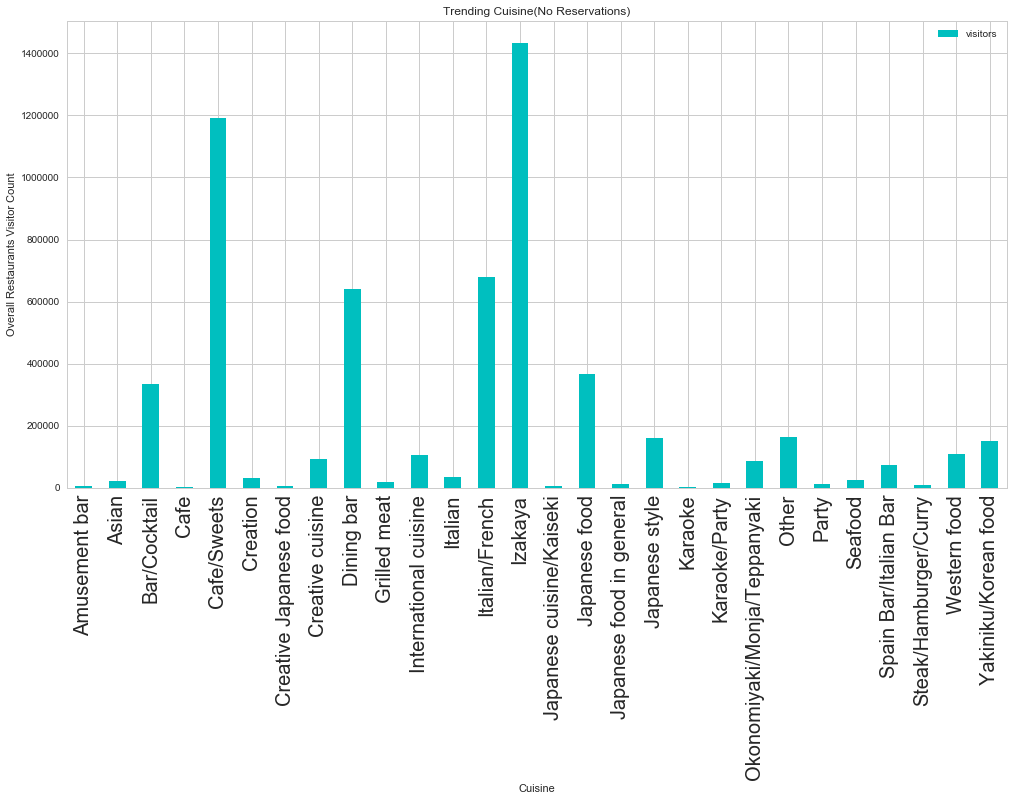

In [52]:
f,ax=plt.subplots(1,1,figsize=(15,8))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
df1_genre.plot(color='c',kind='bar',ax=ax)
plt.title("Trending Cuisine(No Reservations)")
plt.ylabel('Overall Restaurants Visitor Count')
plt.xlabel('Cuisine')
plt.show()

#### From the plot above between cuisine and total visitor count, it is clear Most of the visitors ordered Izakaya food in total

#### Visitors With Reservation

In [53]:
df2_genre = df_hpg_reserve_air_total[['air_genre_name','reserve_visitors']].groupby('air_genre_name').sum()

In [54]:
df2_genre

,reserve_visitors
air_genre_name,
Amusement bar,1846
Asian,52
Bar/Cocktail,9255
Cafe,3025
Cafe/Sweets,15436
Creation,8725
Creative Japanese food,444
Creative cuisine,7370
Dining bar,57318


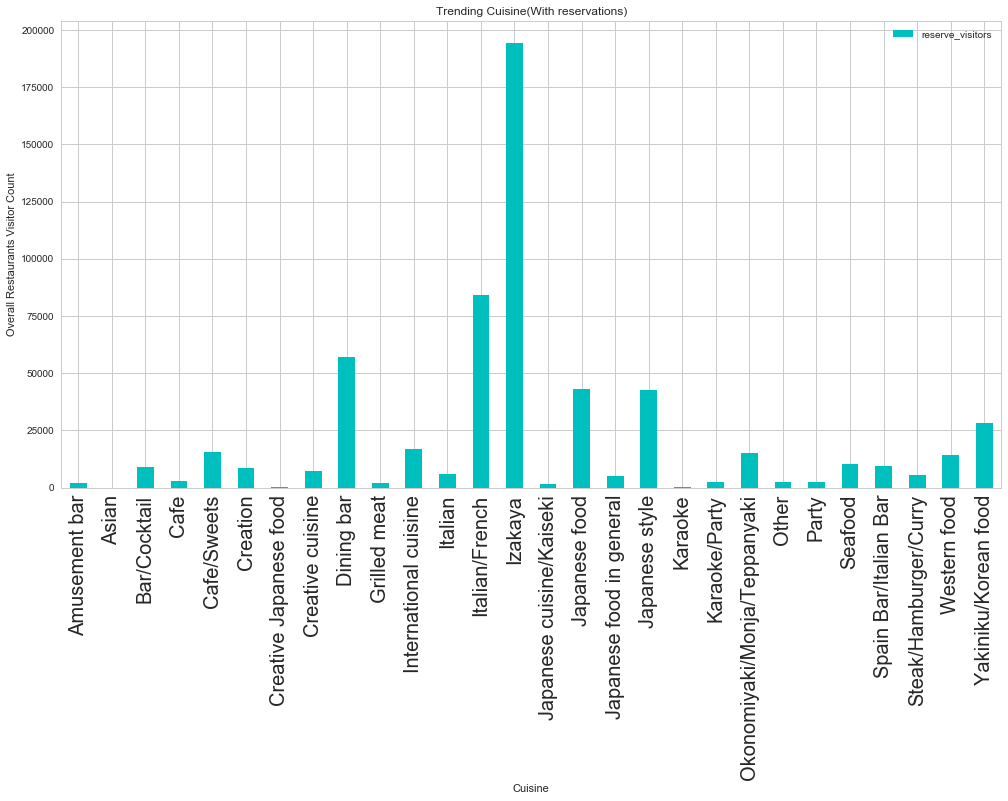

In [55]:
f,ax=plt.subplots(1,1,figsize=(15,8))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
df2_genre.plot(color='c',kind='bar',ax=ax)
plt.title("Trending Cuisine(With reservations)")
plt.ylabel('Overall Restaurants Visitor Count')
plt.xlabel('Cuisine')
plt.show()

##### From the plot above, it can be inferred that most of the reserved restaurants are those which serve Izakaya food.

#### Competition trends among restaurants based on location

In [56]:
df_air_visit_train.head()

,air_area_name,air_genre_name,air_store_id,latitude,longitude,visit_date,visitors,holiday_flg,day_of_week
0,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_0f0cdeee6c9bf3d7,34.695124,135.197852,2016-07-01,18,0,Fri
1,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_0f0cdeee6c9bf3d7,34.695124,135.197852,2016-07-02,37,0,Sat
2,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_0f0cdeee6c9bf3d7,34.695124,135.197852,2016-07-03,20,0,Sun
3,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_0f0cdeee6c9bf3d7,34.695124,135.197852,2016-07-04,16,0,Mon
4,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_0f0cdeee6c9bf3d7,34.695124,135.197852,2016-07-05,15,0,Tue


In [57]:
df1_restaurant = df_air_visit_train[['latitude','longitude','air_store_id']]
#dropping duplicates of weather location and air_store_ids
df1_restaurant = df1_restaurant.drop_duplicates()
df1_restaurant['location'] = df1_restaurant['latitude'] + df1_restaurant['longitude']

In [58]:
df1_restaurant = df1_restaurant.groupby('location').count().reset_index()

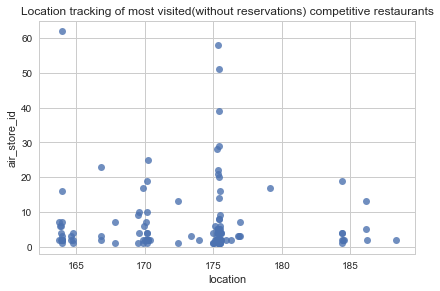

In [59]:
sns.regplot(data=df1_restaurant, x='location', y='air_store_id',fit_reg=False)
plt.title("Location tracking of most visited(without reservations) competitive restaurants")
plt.show()

In [60]:
df_hpg_reserve_air_total.head()

,air_area_name,air_genre_name,air_store_id,latitude,longitude,day_of_week,holiday_flg,reserve_datetime,reserve_visitors,visit_date,visit_datetime,time_diff
0,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_0f0cdeee6c9bf3d7,34.695124,135.197852,Fri,0,2016-06-16 20:00:00,3,2016-07-01,2016-07-01 18:00:00,15
1,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_0f0cdeee6c9bf3d7,34.695124,135.197852,Mon,0,2016-07-04 17:00:00,2,2016-07-04,2016-07-04 17:00:00,0
2,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_0f0cdeee6c9bf3d7,34.695124,135.197852,Mon,0,2016-07-01 20:00:00,8,2016-07-04,2016-07-04 20:00:00,3
3,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_0f0cdeee6c9bf3d7,34.695124,135.197852,Wed,0,2016-07-05 20:00:00,2,2016-07-06,2016-07-06 19:00:00,1
4,Hyōgo-ken Kōbe-shi Kumoidōri,Italian/French,air_0f0cdeee6c9bf3d7,34.695124,135.197852,Wed,0,2016-07-04 14:00:00,5,2016-07-06,2016-07-06 19:00:00,2


In [61]:
df2_restaurant = df_hpg_reserve_air_total[['latitude','longitude','air_store_id']]
#dropping duplicates of weather location and air_store_ids
df2_restaurant = df2_restaurant.drop_duplicates()
df2_restaurant['location'] = df2_restaurant['latitude'] + df2_restaurant['longitude']

In [62]:
df2_restaurant = df2_restaurant.groupby('location').count().reset_index()

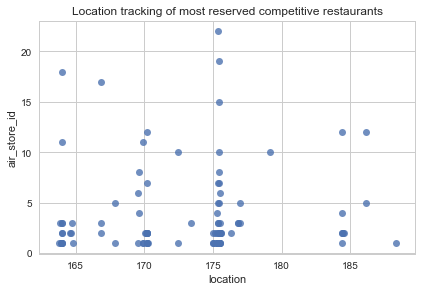

In [63]:
sns.regplot(data=df2_restaurant, x='location', y='air_store_id',fit_reg=False)
plt.title("Location tracking of most reserved competitive restaurants")
plt.show()

Most competitive restaturants with reservations are located in a place where the sum of of latitide and logitude is approximate to 175.
